# 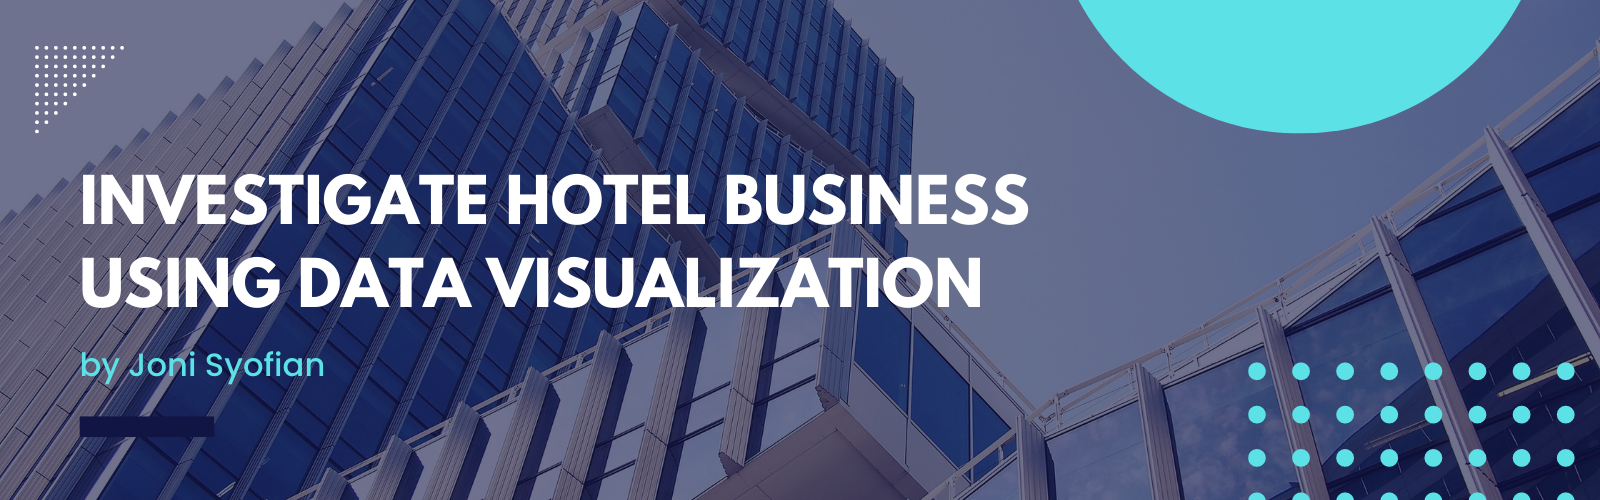

## Background
It is critical for a company to constantly assess its business performance. The company can take appropriate action to deal with a problem by analyzing business performance.

On this occasion, we will examine the hotel industry's performance. The primary goal of this project is to identify the customer actors involved in hotel bookings and their relationship to hotel cancellation rates. So three things will be analyzed in this project:
  
1. Monthly Hotel Booking Analysis Based on Hotel Type
2. Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates
3. Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

Based on the results of the insights obtained, visualization will be carried out so that they can be easily understood.

## Data
The data used in this project consists of 29 columns and 119390 rows. Data can be accessed [here](https://drive.google.com/file/d/1ZMvMRMFEhyMK-wUbpQZqYQ89JcARKtuC/view?usp=share_link). This project's creation makes the assumption that the data is either from an order placed in 119390 or that there are no duplicates.  The following is a description of each column in the data set.
| Column        | Description |
|:-------------|:-----|   
|hotel|  The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city hotel|
|is_canceled|  Value indicating if the booking was canceled (1) or not (0)
|lead_time|  Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
|arrival_date_year|  Year of arrival date
|arrival_date_month|  Month of arrival date with 12 categories: “January” to “December”
|arrival_date_week_number|  Week number of the arrival date
|arrival_date_day_of_month|  Day of the month of the arrival date
|stays_in_weekend_nights|  Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
|stays_in_weekdays_nights|  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting the number of week nights
|adults|  Number of adults
|children|  Number of children
|babies|  Number of babies
|meal|  Meal menu
|city|  City of origin
|market_segment|  Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
|distribution_channel|  Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
|is_repeated_guest|  Value indicating if the booking name was from a repeated guest (1) or not (0)
|previous_cancellations|  Number of previous bookings that were cancelled by the customer prior to the current booking
|previous_bookings_not_canceled|  Number of previous bookings not cancelled by the customer prior to the current booking
|booking_changes|  Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
|deposit_type|  No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay
|agent|ID of the travel agency that made the booking
|company|ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
|days_in_waiting_list| Number of days the booking was in the waiting list before it was confirmed to the customer
|customer_type| Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
|adr| Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)
|required_car_parking_spaces| Number of car parking spaces required by the customer
|total_of_special_requests| Number of special requests made by the customer (e.g. twin bed or high floor)
|reservation_status| Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why  

## Stages
The project will go through several stages as follows:  
1. Load data:  load data from source
2. Data Preprocessing: handling missing values and incorrect values from numerical and categorical data
3. Insight and Visualization: Visualization and analysis of the visualization through the three things above
4. Business Recommendation: Provide business recommendations from the results of the analysis

## Install and Import Library

In [2]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import missingno as msn

print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Seaborn version:', sns.__version__)
print('Matplotlib version:', matplotlib.__version__)
print('Missingno version:', msn.__version__)

Pandas version: 1.4.2
Numpy version: 1.21.5
Seaborn version: 0.11.2
Matplotlib version: 3.6.2
Missingno version: 0.5.1


## Load Data

In [3]:
# load data from google drive
URL ='https://drive.google.com/file/d/1ZMvMRMFEhyMK-wUbpQZqYQ89JcARKtuC/view?usp=share_link'
data = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(data,delimiter=',')

In [4]:
# See the first 14 features
df.iloc[:,:14].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka


In [5]:
# See the second 14 features
df.iloc[:,15:].head()

,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## Handling Missing Values



In [6]:
# missing value with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<AxesSubplot: >

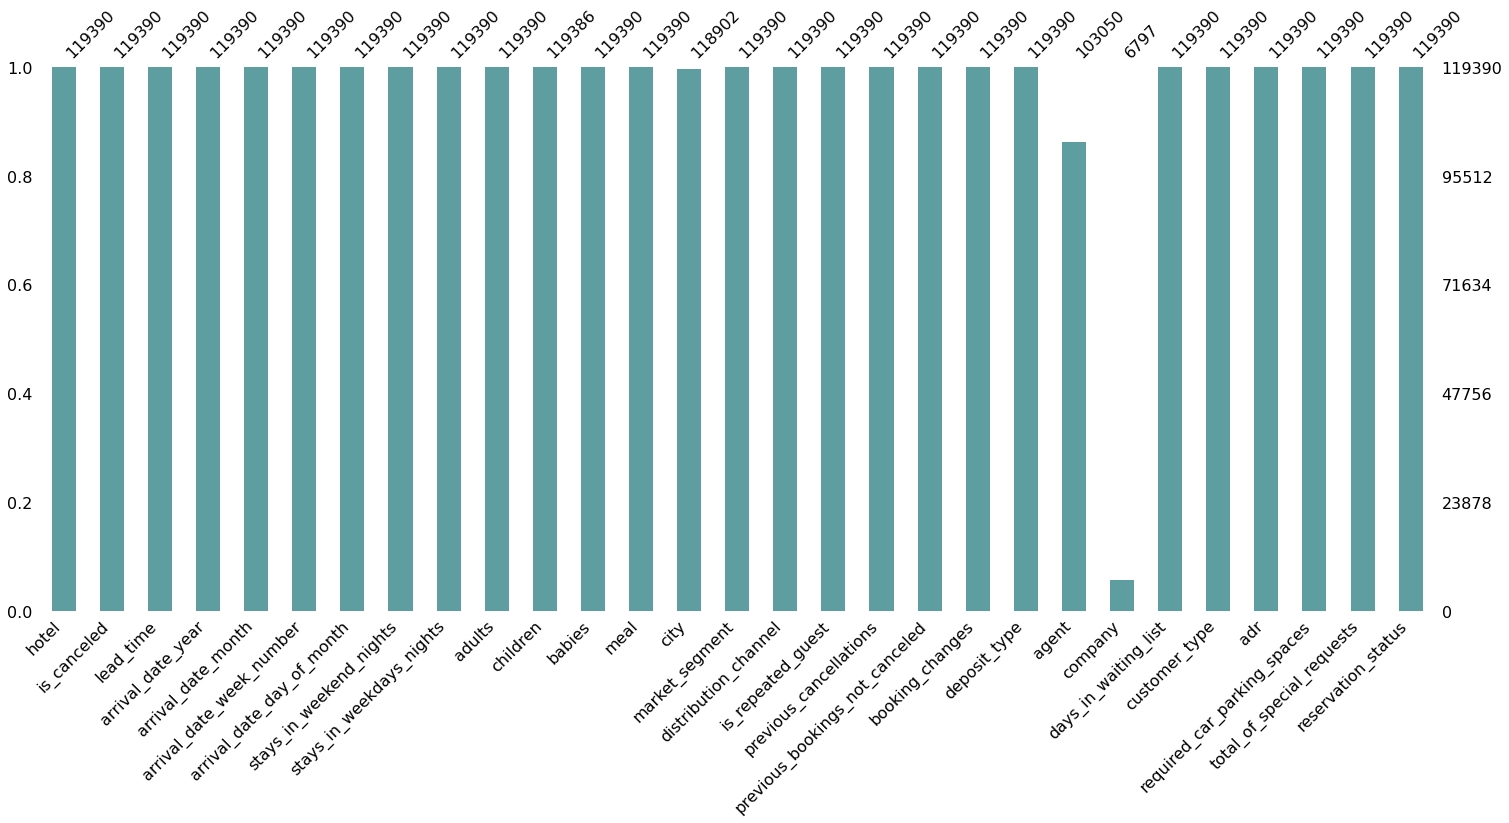

In [7]:
plt.figure(figsize=(12,8))
msn.bar(df,color='cadetblue')

From above, we can see that some features have missing values. So let's calculate!

In [8]:
#calculate missing value in percentage
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,4)
data_missing_value = data_missing_value.sort_values('percentage',ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,company,112593,94.3069
1,agent,16340,13.6862
2,city,488,0.4087
3,children,4,0.0034


So there are four missing values, and the missing value for feature company is 94.3069%, feature agent is 13.6862%, feature city is 0.4087% and feature children 0.0034%. So we need to handle these.

For the `company` and `agent` feature, we will input with a value of 0 which indicates that the customer has booked a ticket without an agent or company. For `city` feature, we will impute them with 'Unknown' which means that the city of origin is unknown. the last one, for `children` feature missing values indicates that the customer did not have any children with them. So, we will input 0 values for handling missing value.

In [9]:
# handling missing values (null values)
df['children'] = df['children'].fillna(0) 
df['city'] = df['city'].fillna('Unknown') 
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Let's explore for the next steps! we need change the data type for some features. we will change the data type of  of children, agent and company features to integer instead of float.

In [10]:
# change the data type of children, agent and company features to integer instead of float
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [11]:
# Makes sure that the data type was changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

The data type is changed. So let's move on to the next step.

now we only have one feature that have missing value, agent features. Let's explore more

## Handling Incorect Values

Let's we check incorect values from the features. First we'll separate the data based on its data type.

### Categorical data

In [12]:
# make list of categorical data
sel_cats = list(df.select_dtypes(include='object'))
print(sel_cats)
print("Count of categorical data:", len(sel_cats))

['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']
Count of categorical data: 9


So, we have 9 categorical data from data set. Let's we see the values of each category

In [13]:
for i in sel_cats:
    print(f'''Value count kolom {i}:''')
    print(df[i].value_counts())
    print()

Value count kolom hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count kolom arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64

Value count kolom meal:
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

Value count kolom city:
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 178, dtype: int64

Value count kolom mark

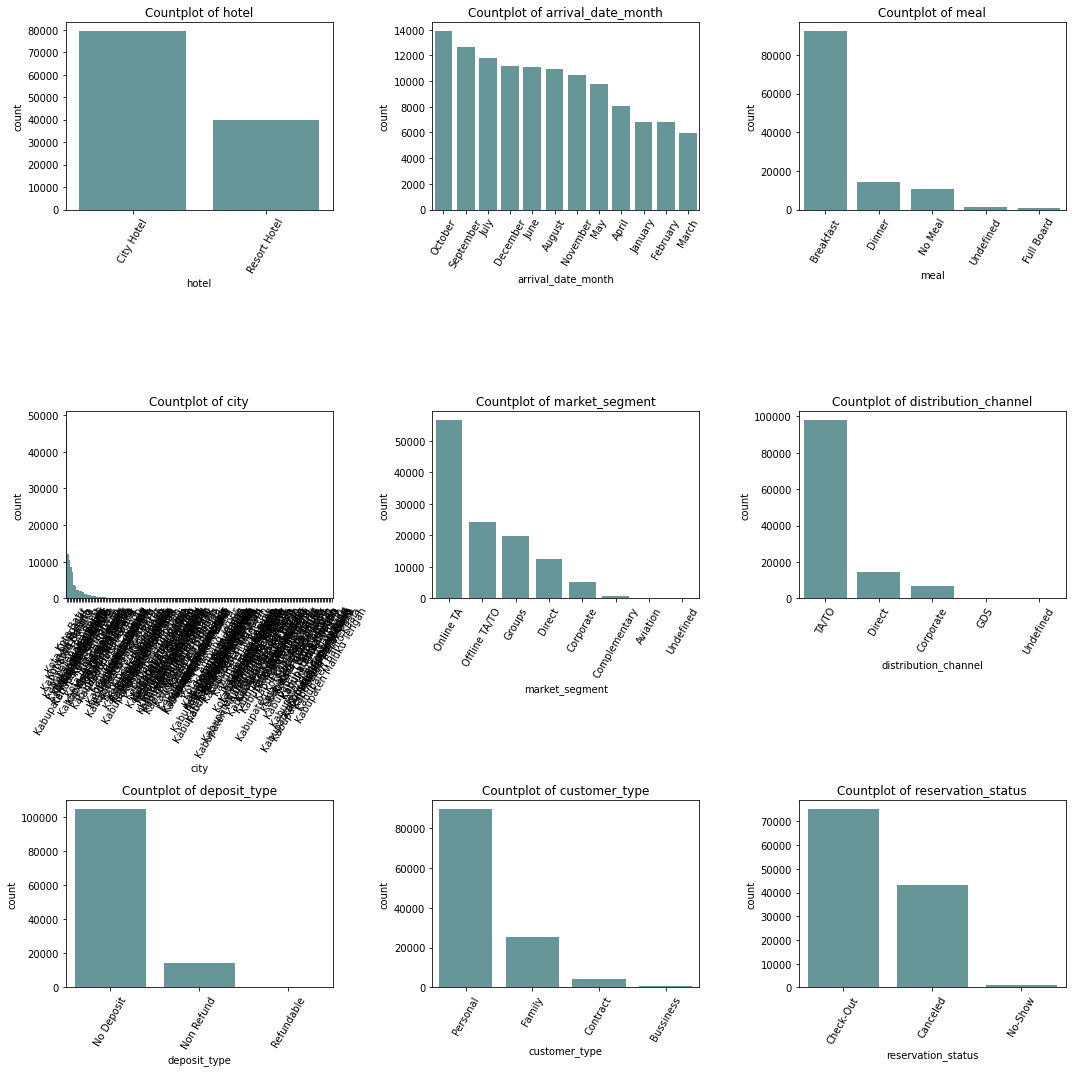

In [14]:
# Membuat catplot untuk setiap kolom kategori
plt.figure(figsize=(15, 15))
for i in range(0, len(sel_cats)):
    plt.subplot(3,3, i+1)
    sns.countplot(x=df[sel_cats[i]], color='cadetblue', order = df[sel_cats[i]].value_counts().index)
    plt.title('Countplot of {}'.format(sel_cats[i]))
    plt.tight_layout()
    plt.xticks(rotation = 60)

plt.show()

We can see from the figure above that some features have an "undefined" value. So we will handle it by changing the value "undefined" to the most valuable value in that feature. But for `meal` feature the "undefined" values will replaces with "No Meal" because "undefined" and "No Meal" have the same meaning.

In [15]:
# Replace 'Undefined' in 'meal' feature with 'No Meal'
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')

# Replace 'Undefined' in 'market_segment' and  'distribution_channel' features with the most value in that features.
df['market_segment'] = df['market_segment'].replace(['Undefined'], 'Online TA')
df['distribution_channel'] = df['distribution_channel'].replace(['Undefined'], 'TA/TO')

Let's makes sure that the values was changed.

In [16]:
# list of features that values was changed
cat_changed = ['meal','market_segment','distribution_channel']

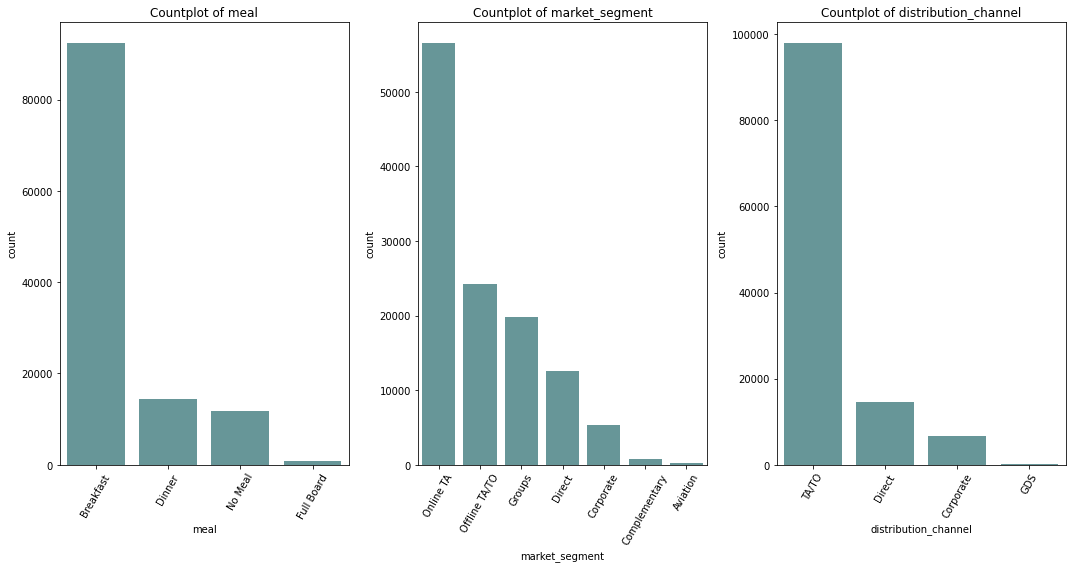

In [17]:
plt.figure(figsize=(15, 8))
for i in range(0, len(cat_changed)):
    plt.subplot(1,3, i+1)
    sns.countplot(x=df[cat_changed[i]], color='cadetblue', order = df[cat_changed[i]].value_counts().index)
    plt.title('Countplot of {}'.format(cat_changed[i]))
    plt.tight_layout()
    plt.xticks(rotation = 60)

plt.show()

So, the values was changed

### Numerical data

In [18]:
# make list of numerical data
sel_nums = list(df.select_dtypes(include=['float64','int64']))
print(sel_nums)
print("Count of numerical data:", len(sel_nums))

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Count of numerical data: 20


In [19]:
for i in sel_nums:
    print(f'''Value count kolom {i}:''')
    print(df[i].value_counts())
    print()

Value count kolom is_canceled:
0    75166
1    44224
Name: is_canceled, dtype: int64

Value count kolom lead_time:
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

Value count kolom arrival_date_year:
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64

Value count kolom arrival_date_week_number:
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     12

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

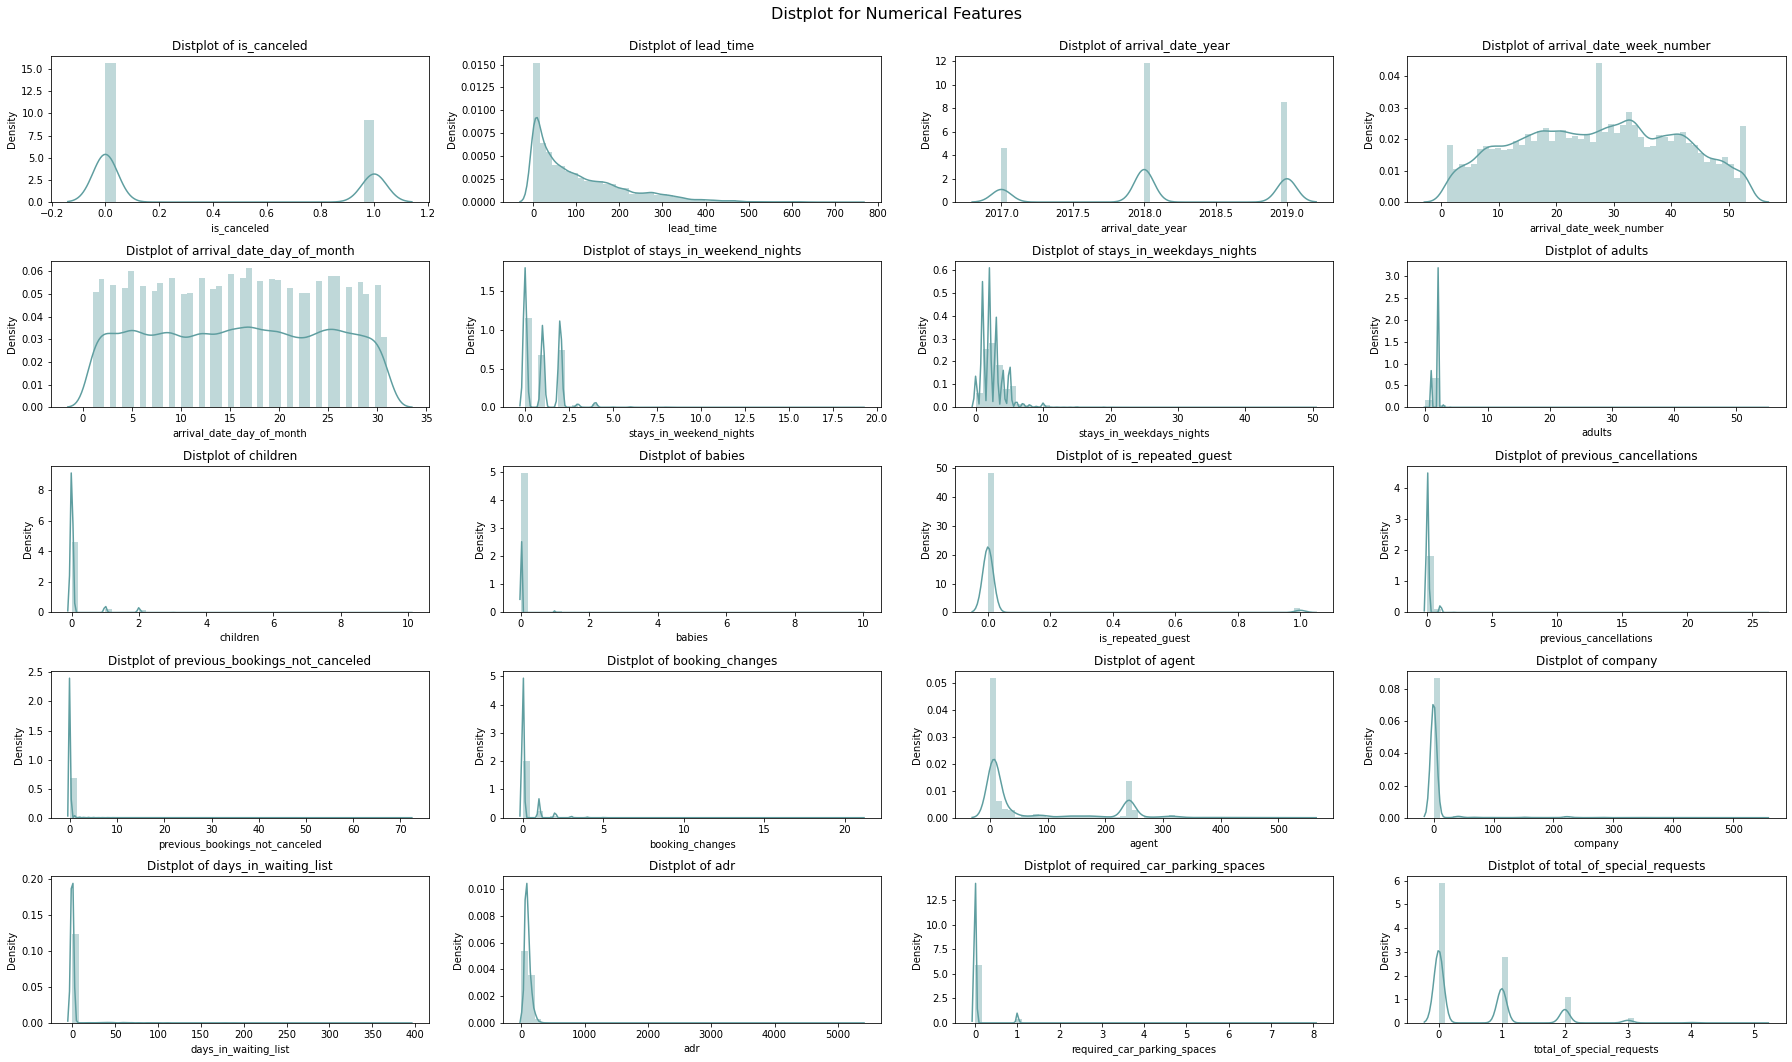

In [20]:
# Membuat distplot untuk seluruh numerical features
plt.figure(figsize=(25, 15))
for i in range(0, len(sel_nums)):
    plt.subplot(5,4, i+1)
    sns.distplot(df[sel_nums[i]], color='cadetblue')
    plt.title('Distplot of {}'.format(sel_nums[i]))
    plt.suptitle('Distplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

We will remove unnecessary data with 0 guest and 0 night. first we Create new feature `total_guests` from the combination of `adults`, `children`, `babies` features , then we Create new feature `stay_duration` from the combination of `stays_in_weekend_nights` and `stays_in_weekdays_nights`, and then we remove data with 0 `total_guest` and 0 `stay duration`.

In [21]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('Data with 0 guest: {0} out of {1} all data'.format(df[df['total_guests'] == 0].shape[0], df.shape[0]))
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('Data with 0 night: {0} out of {1} all data'.format(df[df['stay_duration'] == 0].shape[0], df.shape[0]))
# Remove unnecessary data
df_clean = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)].copy()
print('before pre-processing:', df.shape[0])
print('after pre-processing:', df_clean.shape[0])

Data with 0 guest: 180 out of 119390 all data
Data with 0 night: 715 out of 119390 all data
before pre-processing: 119390
after pre-processing: 118565


## Insight and Visualization

### Monthly Hotel Booking Analysis Based on Hotel Type

In the hospitality business, of course, it is closely related to the customer. The more customers who order, the more income the company has. Therefore, analyzing the behavior of customers when booking hotels is very important. For example, we can identify what types of hotels are most in demand by customers, and we can also associate this with the season conditions when these hotels are booked. So at this stage, we will look for a comparison of the number of hotel bookings every month based on the type of hotel.

In [22]:
# create a copy data frame from df_clean
df2 = df_clean.copy()

First, we group data by "hotel" and "arrival_date_month," and we aggregate "arrival_date_year" with "unique" and "count" to see counts of bookings based on hotel type, month, and year.

In [23]:
df2_gb = df2.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df2_gb.columns = ['hotel_type','arrival_month','unique_year','total_booking']
df2_gb

,hotel_type,arrival_month,unique_year,total_booking
0,City Hotel,April,2,4917
1,City Hotel,August,2,7874
2,City Hotel,December,2,7554
3,City Hotel,February,2,4097
4,City Hotel,January,2,4309
5,City Hotel,July,2,8184
6,City Hotel,June,2,7458
7,City Hotel,March,2,3712
8,City Hotel,May,2,6411
9,City Hotel,November,2,7377


So, we already have a new data frame based on `hotel_type`, `arrival month`, `unique year`, and `total booking`. We can see from the data frame that the data for October and September were taken from 3 years ago, but for other months, the data was taken from 2 years ago. So here, the data needs to be normalized so that the comparison is appropriate.

In [24]:
# Data normalization through the determination of the average monthly order volume over various years
df2_gb['Average_Booking'] = round(df2_gb['total_booking']/df2_gb['unique_year'])
df2_gb

,hotel_type,arrival_month,unique_year,total_booking,Average_Booking
0,City Hotel,April,2,4917,2458.0
1,City Hotel,August,2,7874,3937.0
2,City Hotel,December,2,7554,3777.0
3,City Hotel,February,2,4097,2048.0
4,City Hotel,January,2,4309,2154.0
5,City Hotel,July,2,8184,4092.0
6,City Hotel,June,2,7458,3729.0
7,City Hotel,March,2,3712,1856.0
8,City Hotel,May,2,6411,3206.0
9,City Hotel,November,2,7377,3688.0


For visualization purposes, we need to sort the months and abbreviate the month names.

In [25]:
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df2_gb['month'] = df2_gb['arrival_month'].str[:3]
df2_gb['month'] = pd.Categorical(df2_gb['month'], categories=ordered_months, ordered=True)
df2_gb

,hotel_type,arrival_month,unique_year,total_booking,Average_Booking,month
0,City Hotel,April,2,4917,2458.0,Apr
1,City Hotel,August,2,7874,3937.0,Aug
2,City Hotel,December,2,7554,3777.0,Dec
3,City Hotel,February,2,4097,2048.0,Feb
4,City Hotel,January,2,4309,2154.0,Jan
5,City Hotel,July,2,8184,4092.0,Jul
6,City Hotel,June,2,7458,3729.0,Jun
7,City Hotel,March,2,3712,1856.0,Mar
8,City Hotel,May,2,6411,3206.0,May
9,City Hotel,November,2,7377,3688.0,Nov


C:\Users\User\AppData\Local\Temp\ipykernel_8296\2568374333.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


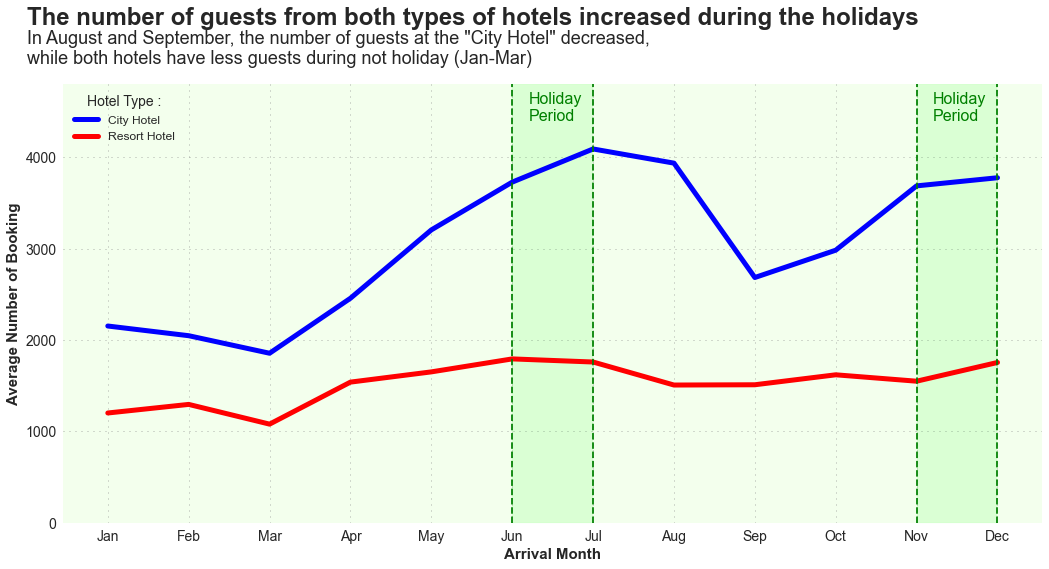

In [26]:
style.use('seaborn')
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax = sns.lineplot(x='month', y='Average_Booking', hue='hotel_type',
                  size='hotel_type', sizes=(5, 5), data=df2_gb, palette= ['blue', 'red'])
ax.tick_params(axis='both', which='major', labelsize=14)

ax.legend(title='Hotel Type :', title_fontsize=14, prop={'size':12}, fontsize='x-large')
ax.text(x=-1, y=5450, s='The number of guests from both types of hotels increased during the holidays', fontsize=24, fontweight='bold')
ax.text(x=-1, y=5020, s='In August and September, the number of guests at the "City Hotel" decreased,\nwhile both hotels have less guests during not holiday (Jan-Mar)', fontsize=18)

ax.axvline(5, ls='--', color='green')
ax.axvline(6, ls='--', color='green')
ax.stackplot(np.arange(5,7,1),[[4800]], color='lime', alpha=0.1)
ax.text(x=5.2, y=4400, s='Holiday\nPeriod', fontsize=16, color='green')

ax.axvline(10, ls='--', color='green')
ax.axvline(11, ls='--', color='green')
ax.stackplot(np.arange(10,12,1),[[4800]], color='lime', alpha=0.1)
ax.text(x=10.2, y=4400, s='Holiday\nPeriod', fontsize=16, color='green')

ax.set_facecolor('#f3ffed')
ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)
ax.grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)

plt.xlabel('Arrival Month', fontsize=15, fontweight='bold')
plt.ylabel('Average Number of Booking', fontsize=15, fontweight='bold')
plt.ylim(0,4800)
plt.tight_layout()

* During the holiday period, both hotels have more guests, with the City Hotel having more than the Resort Hotel.
* In Indonesia, most schools have holidays from June through July. Typically, a lot of families would travel together at that time. This explains why June and July saw an increase in visitors at both hotels. This can be used as one of the reasons for the timing of marketing implementation.
* From August to September, City Hotel's guest number decreases significantly. 
It's because of the school period. so that the number of guests has decreased from the school holiday period.
* The lowest value of average number of booking at March (for both hotel types).

### Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In addition to analyzing customer behavior in booking hotels, to measure the success of a hotel business, we can see the level of order cancellations. If many customers cancel their orders, this will adversely affect the hotel's business performance. Therefore, we need to find out what factors affect the cancellation of orders. At this stage we will investigate how the length of stay can affect the cancellation rate of hotel bookings.

In [27]:
# create a copy data frame from df_clean
df3 = df_clean.copy()

First, let's we see distribution of `stay_duration` feature

C:\Users\User\AppData\Local\Temp\ipykernel_8296\2795076644.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


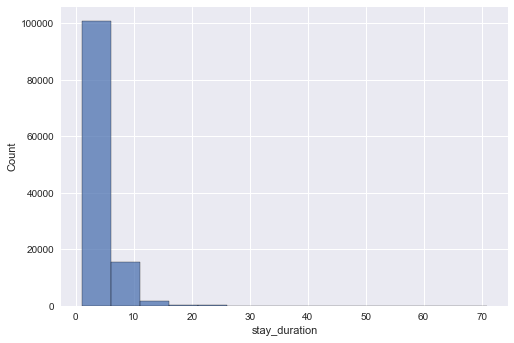

In [28]:
style.use('seaborn')
sns.histplot(data=df3, x='stay_duration', binwidth=5);

So, from above we can see that the distribution of `stay_duration` is right skewed. So, we will grouping that values into 4 groups.
* 1-7 days
* 8-14 days
* 15-21 days
* more than 21 days 

In [29]:
# Grouping stay_duration into 4 groups, 1-7 days, 8-14 days, 14-21 days and >21 days
df3['stay_duration_group'] = np.where(df3.stay_duration < 8, 7, 
                            (np.where((df3.stay_duration > 7) & (df3.stay_duration < 15), 14,
                            (np.where((df3.stay_duration > 14) & (df3.stay_duration < 22),21 , 22)))))

# Using group by to aggregate the data to count monthly hotel booking based on hotel type
df3_agg = df3.groupby(['hotel', 'is_canceled', 'stay_duration_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
df3_pivot = df3_agg.pivot_table(index=['hotel', 'stay_duration_group'], columns='is_canceled', values='num_bookings').reset_index()

# percentage cancellation rate
df3_pivot['cancellation_rate'] = round(df3_pivot[1]/(df3_pivot[0]+df3_pivot[1])*100, 2)
df3_pivot

is_canceled,hotel,stay_duration_group,0,1,cancellation_rate
0,City Hotel,7,45287,32391,41.70
1,City Hotel,14,511,558,52.20
2,City Hotel,21,29,76,72.38
3,City Hotel,22,6,41,87.23
4,Resort Hotel,7,25754,9907,27.78
5,Resort Hotel,14,2650,1078,28.92
6,Resort Hotel,21,90,79,46.75
7,Resort Hotel,22,62,46,42.59


We already have data frame for cancellation rate. Let's make visualization!

C:\Users\User\AppData\Local\Temp\ipykernel_8296\1848503978.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


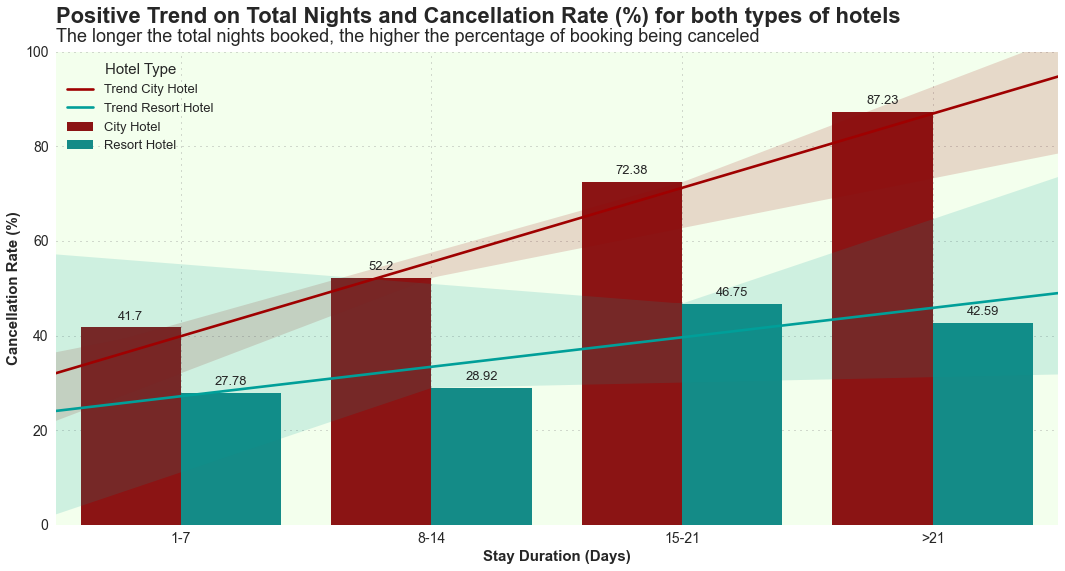

In [30]:
# Visualization total nights and cancellation rate
style.use('seaborn')

fig, ax = plt.subplots(figsize=(15, 8))

cols = ['#9f0000', '#009f99']
sns.barplot(x='stay_duration_group', y='cancellation_rate', hue='hotel', data=df3_pivot, palette=cols)

sns.regplot(x=np.arange(0, len(df3_pivot[df3_pivot['hotel'] == 'City Hotel'])), y='cancellation_rate', data=df3_pivot[df3_pivot['hotel'] == 'City Hotel'], 
            scatter=False, label='Trend City Hotel', truncate=False, color='#9f0000')

sns.regplot(x=np.arange(0, len(df3_pivot[df3_pivot['hotel'] == 'City Hotel'])), y='cancellation_rate', data=df3_pivot[df3_pivot['hotel'] == 'Resort Hotel'],
            scatter=False, label='Trend Resort Hotel', truncate=False, color='#009f99')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_facecolor('#f3ffed')
ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)
ax.grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)
ax.text(x=-0.5, y=106, s='Positive Trend on Total Nights and Cancellation Rate (%) for both types of hotels', fontsize=22, fontweight='bold')
ax.text(x=-0.5, y=102, s='The longer the total nights booked, the higher the percentage of booking being canceled', fontsize=18)
ax.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})

plt.bar_label(ax.containers[0], fontsize=13, padding=5)
plt.bar_label(ax.containers[1], fontsize=13, padding=5)

plt.xticks(range(0,4,1), labels=['1-7', '8-14', '15-21', '>21'])
plt.xlabel('Stay Duration (Days)', fontsize=15, fontweight='bold')
plt.ylabel('Cancellation Rate (%)', fontsize=15, fontweight='bold')
plt.ylim(0, 100)
plt.xlim(-0.5, 3.5)
plt.tight_layout()

From above we know that:
* The longer the total number of nights booked, the higher the cancellation rate (positive trend); City hotels have a steeper trend than Resort hotels.
* The higher cancellation rate for both hotels; city hotel on >21 days stay duration (87.23%) and resort hotel on 15-21 days stay duration (46.75%)
* To prevent this from happening, the hotels should implement a cancellation policy. The longer the total number of nights booked, the higher the cancellation fee.

### Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

The hotel business usually allows customers to book hotels before the day of their arrival. The time intervals that occur also vary, some are only a few days, and there are also customers who book hotels up to several months before the day of arrival. So, we will check whether the time interval between hotel reservations and the customer's arrival day has an effect on the rate of cancellation of hotel bookings.

In [31]:
# create a copy data frame from df_clean
df4 = df_clean.copy()

First let's we check distribution of the `lead_time` feature.

C:\Users\User\AppData\Local\Temp\ipykernel_8296\2753287746.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


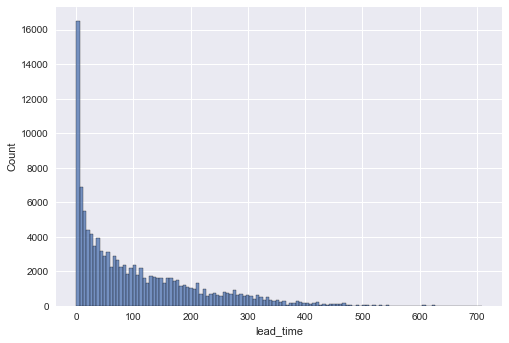

In [32]:
style.use('seaborn')
sns.histplot(data=df3, x='lead_time');

We can see that `lead_time` is right-skewed. Within 30 days, we will form groups. but first, let's we check the maximum value of `lead_time`.

In [33]:
print("maximum value of 'lead_time' is:", max(df['lead_time']))

maximum value of 'lead_time' is: 737


Because the maximum value is to far, we need to limit at least 390 or 13 months . value other than that put in more than one year

In [34]:
df4['lead_times'] = np.where(df4['lead_time'] > 360, 390, df4['lead_time'])
df4['lead_times'].value_counts()

0      6007
390    3412
1      3386
2      2042
3      1804
       ... 
357      18
331      16
345      14
347      12
354       9
Name: lead_times, Length: 362, dtype: int64

now, we make list variable multiple of 30

In [35]:
bins = list(np.arange(0,max(df4['lead_times'])+30, 30))
print(bins)

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]


then, we make label multiple of 30.

In [36]:
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
print(labels)

['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240', '240-270', '270-300', '300-330', '330-360', '360-390']


now, we separate the array elements into different bins using pandas cut.

In [37]:
df4['lead_time_group'] = pd.cut(df4['lead_times'],bins=bins, include_lowest=True, labels=labels)
df4['lead_time_group'].value_counts()

0-30       38094
30-60      16896
60-90      12541
90-120     10414
120-150     8126
150-180     7844
180-210     5649
210-240     4303
270-300     3419
360-390     3412
240-270     3400
300-330     2754
330-360     1713
Name: lead_time_group, dtype: int64

now, we grouping the data by `hotel`, `lead_time_group` and `is_canceled` and we aggregate `lead_times` with `count`.

In [38]:
df4_gb = df4.groupby(['hotel','lead_time_group','is_canceled']).agg({'lead_times' : 'count'}).reset_index()
df4_gb.head()

,hotel,lead_time_group,is_canceled,lead_times
0,City Hotel,0-30,0,17848
1,City Hotel,0-30,1,5174
2,City Hotel,30-60,0,7251
3,City Hotel,30-60,1,4607
4,City Hotel,60-90,0,5200


then, we use pivot table to summarize data after grouping.

In [39]:
df4_pivot = df4_gb.pivot_table(index=['hotel','lead_time_group'], columns=['is_canceled'],
                               values=['lead_times']).reset_index()
df4_pivot.columns = ['hotel','lead_time_group','not_canceled','canceled']
df4_pivot

,hotel,lead_time_group,not_canceled,canceled
0,City Hotel,0-30,17848,5174
1,City Hotel,30-60,7251,4607
2,City Hotel,60-90,5200,3690
3,City Hotel,90-120,3955,3486
4,City Hotel,120-150,3061,2542
5,City Hotel,150-180,2440,2716
6,City Hotel,180-210,1797,1793
7,City Hotel,210-240,1223,1280
8,City Hotel,240-270,878,1237
9,City Hotel,270-300,659,1859


and then, we calculate percentage canceled booking of lead time group.

In [40]:
df4_pivot['percentage_canceled'] = round(df4_pivot['canceled']/(df4_pivot['not_canceled']+df4_pivot['canceled'])*100,2)
df4_pivot

,hotel,lead_time_group,not_canceled,canceled,percentage_canceled
0,City Hotel,0-30,17848,5174,22.47
1,City Hotel,30-60,7251,4607,38.85
2,City Hotel,60-90,5200,3690,41.51
3,City Hotel,90-120,3955,3486,46.85
4,City Hotel,120-150,3061,2542,45.37
5,City Hotel,150-180,2440,2716,52.68
6,City Hotel,180-210,1797,1793,49.94
7,City Hotel,210-240,1223,1280,51.14
8,City Hotel,240-270,878,1237,58.49
9,City Hotel,270-300,659,1859,73.83


So, we already have data frame of percentage canceled booking. Let's make visualization!

C:\Users\User\AppData\Local\Temp\ipykernel_8296\2718075244.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


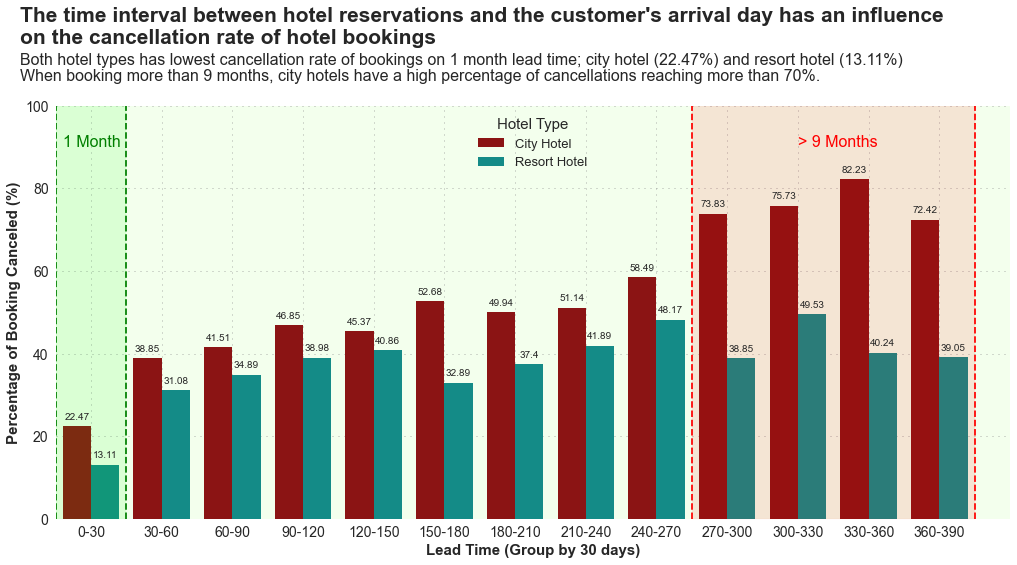

In [41]:
style.use('seaborn')

fig, ax = plt.subplots(figsize=(15, 8))

cols = ['#9f0000', '#009f99']
sns.barplot(x='lead_time_group', y='percentage_canceled', hue='hotel', data=df4_pivot, palette=cols)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_facecolor('#f3ffed')
ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)
ax.grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)
ax.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}, loc ='best')

plt.bar_label(ax.containers[0], fontsize=10, padding=5)
plt.bar_label(ax.containers[1], fontsize=10, padding=5)

ax.text(x=-1, y=115, s="The time interval between hotel reservations and the customer's arrival day has an influence\non the cancellation rate of hotel bookings", fontsize=21, fontweight='bold')
ax.text(x=-1, y=110, s="Both hotel types has lowest cancellation rate of bookings on 1 month lead time; city hotel (22.47%) and resort hotel (13.11%)", fontsize=16)
ax.text(x=-1, y=106, s="When booking more than 9 months, city hotels have a high percentage of cancellations reaching more than 70%.", fontsize=16)
ax.axvline(-0.5, ls='--', color='green')
ax.axvline(0.5, ls='--', color='green')
ax.stackplot(np.arange(-0.5,1.5,1),[[100]], color='lime', alpha=0.1)
ax.text(x=-0.4, y=90, s='1 Month', fontsize=16, color='green')

ax.axvline(8.5, ls='--', color='red')
ax.axvline(12.5, ls='--', color='red')
ax.stackplot(np.arange(8.5,13.5,1),[[100]], color='red', alpha=0.1)
ax.text(x=10, y=90, s='> 9 Months', fontsize=16, color='red')

plt.xlabel('Lead Time (Group by 30 days)', fontsize=15, fontweight='bold')
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15, fontweight='bold')
plt.ylim(0, 100)
plt.xlim(-0.5, 13)
plt.tight_layout()

From above we know that:
* Both hotel types has lowest cancellation rate of bookings on 1 month lead time; city hotel (22.47%) and resort 
hotel (13.11%).
* When booking more than 9 months, city hotels have a high percentage of cancellations reaching more than 70%.
* Resort Hotel has quite stagnant (in around 40%).
* Significant growth of cancellation rate for city hotels each month from around 20% to around 70%, also it 
happens for resort hotels each month from around 10% to around 40%.
* This growth of cancellation rate could be happened because customer vacation plan canceled or the customer forgets to have booked a hotel. In order to prevent them from canceling their reservations, the hotel could send them reminders. Additionally, the hotel could prevent this by making the cancellation policy applicable to all bookings.

## Business Recommendation
Based on the visualization and insight gained, the following businesses can be recommended to the hospitality industry:
1. Hospitality can implement a penalty system to the cancellation of hotel bookings carried out by the order to be able to reduce the cancellation rate of ordering.
2. Hospitality can apply the maximum term or order distance of no more than 3 months in order to reduce the cancellation rate.  
3. Hospitality can implement a reminder system, especially on the order that makes an order for a long time from the time of order.
4. The hotel can carry out marketing or offer products/or services in June-July and November-December where there are many customers.

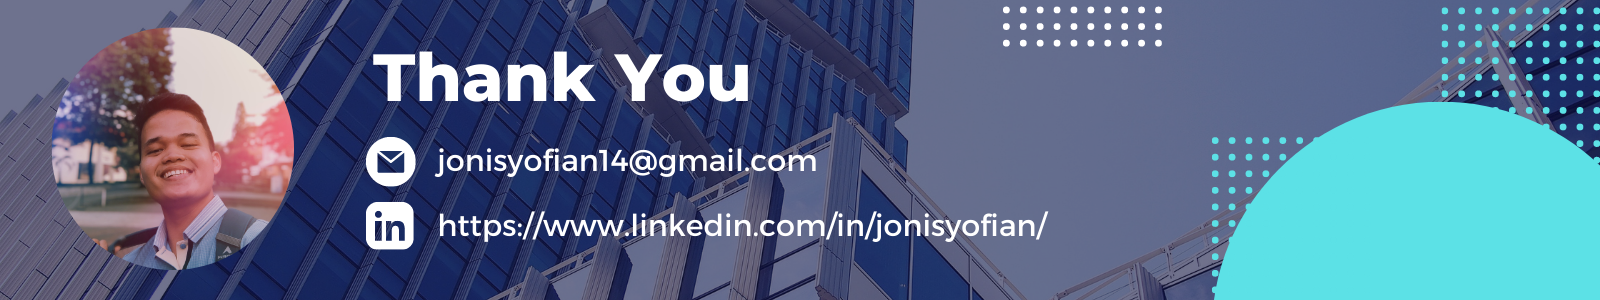